In [13]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import interpolate
from sklearn import metrics

from scipy.signal import convolve



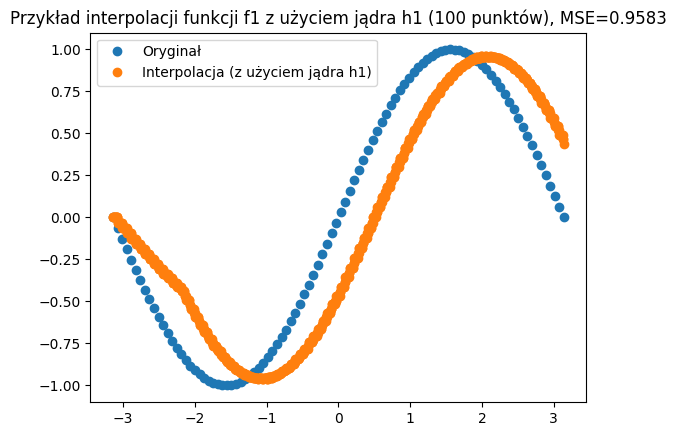

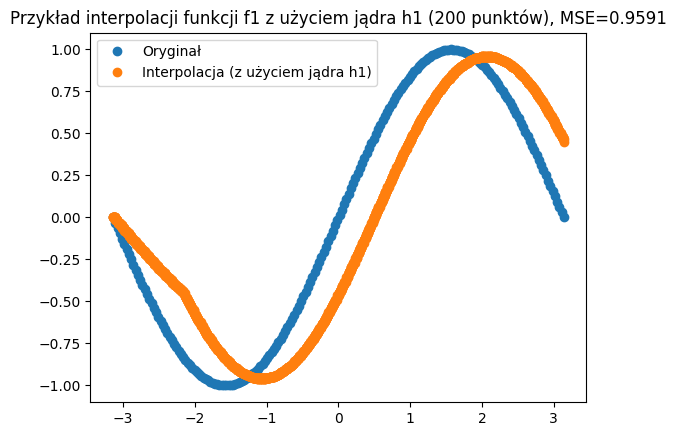

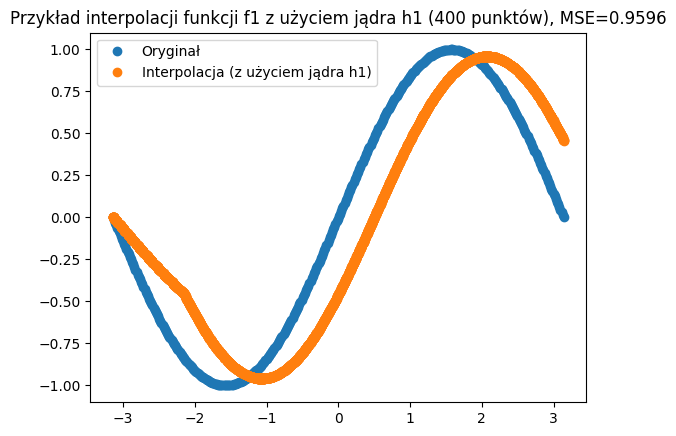

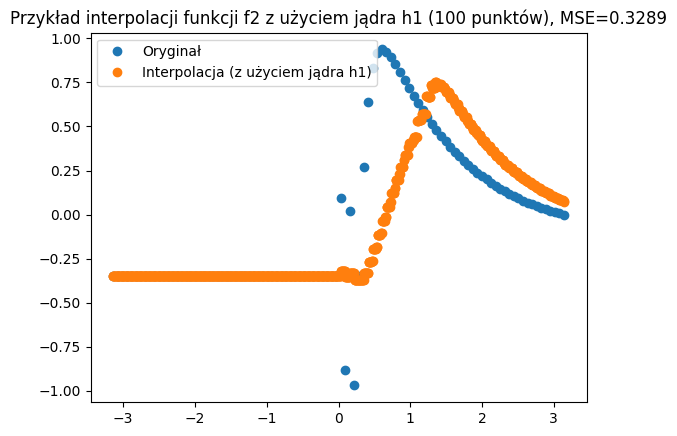

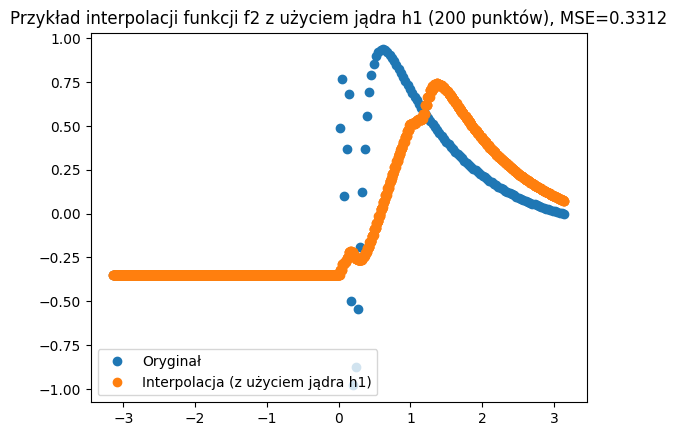

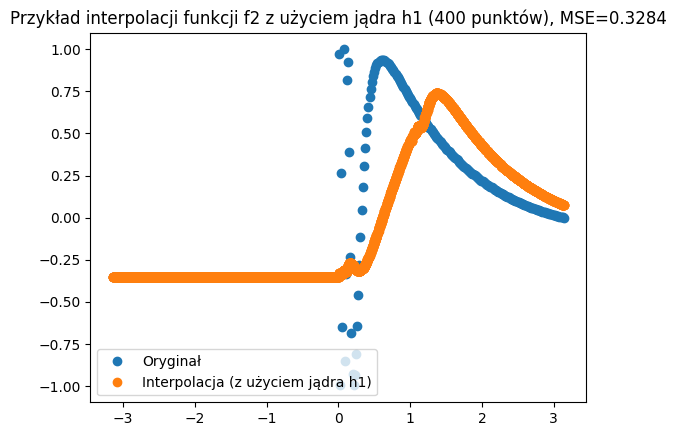

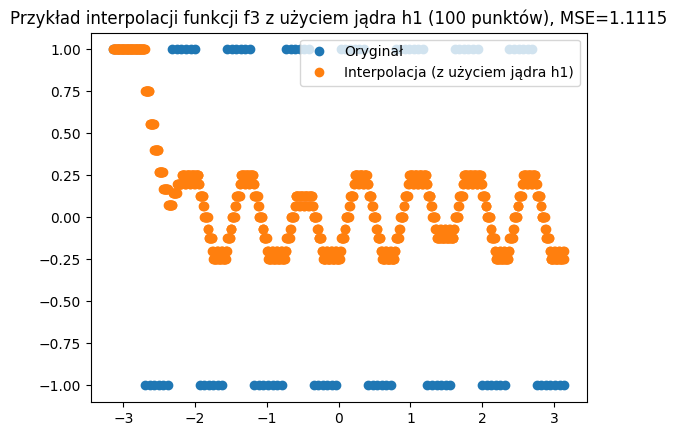

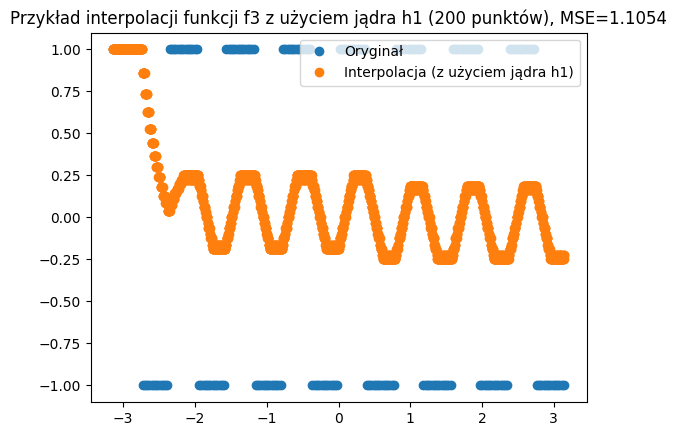

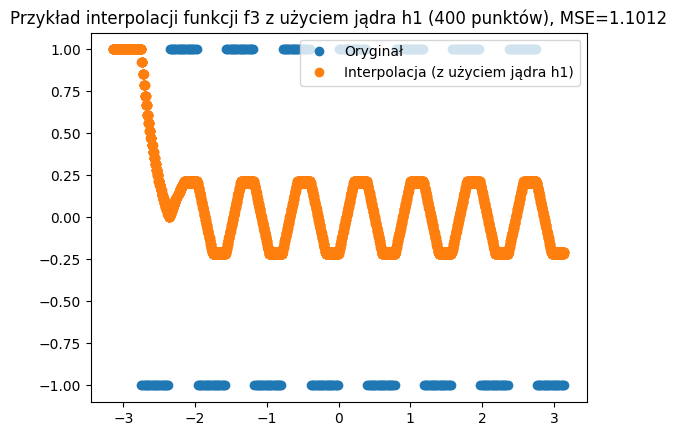

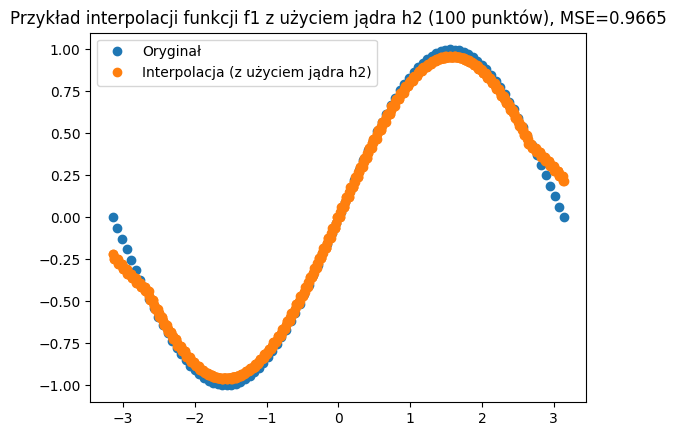

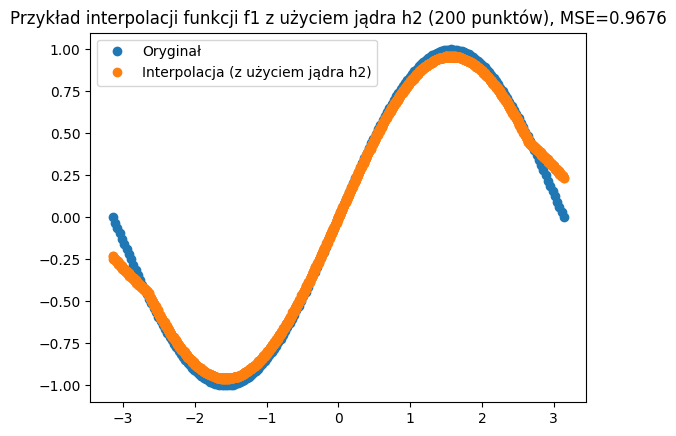

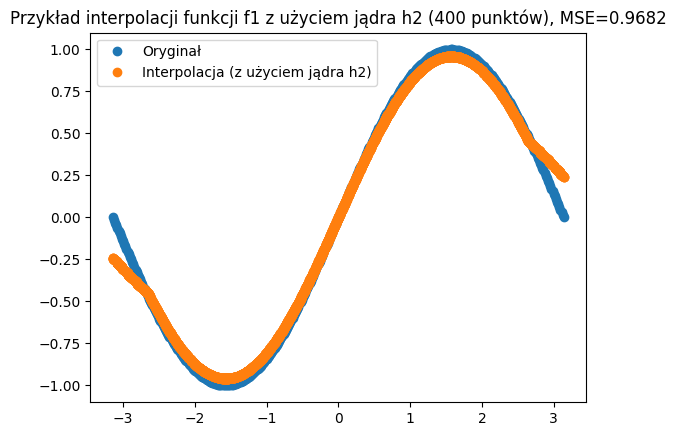

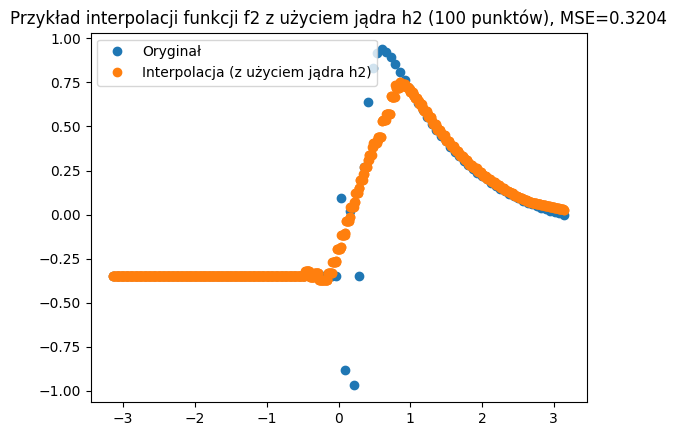

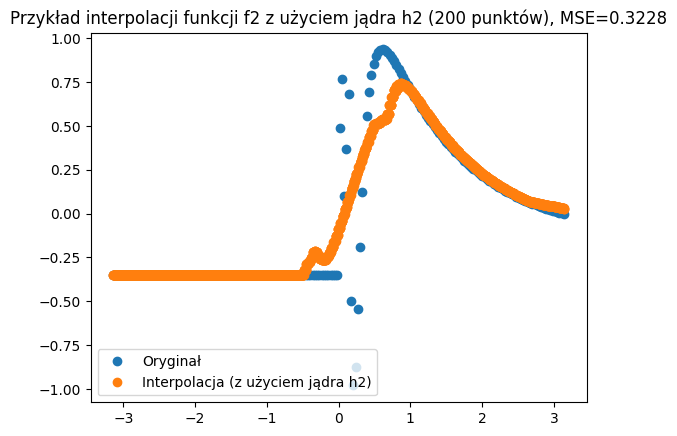

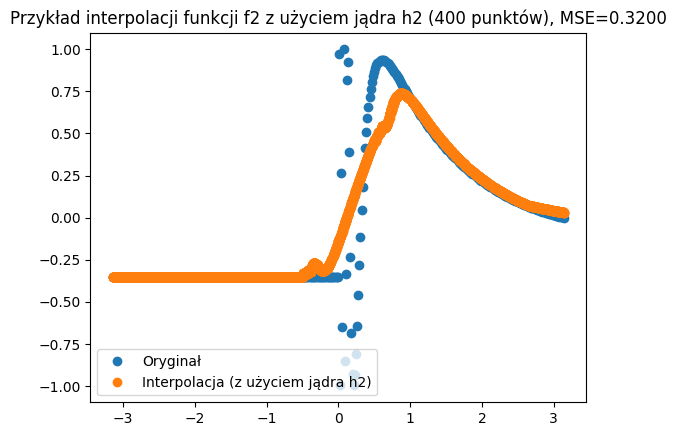

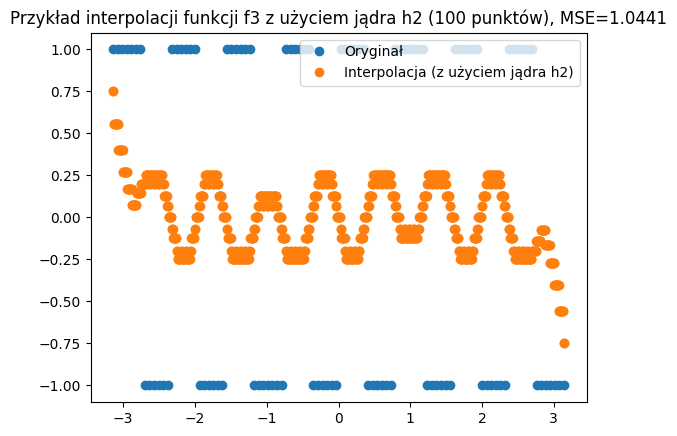

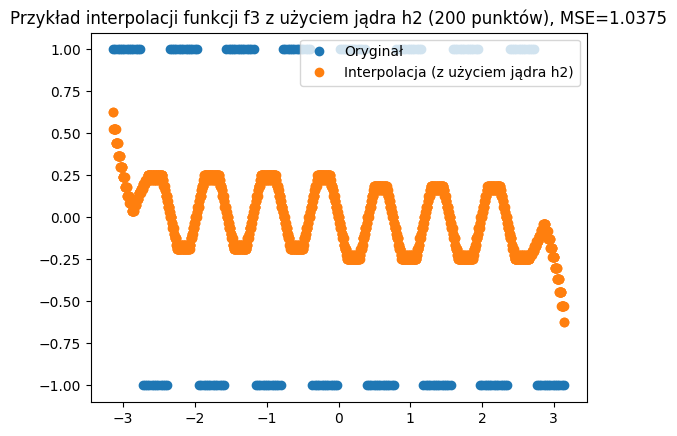

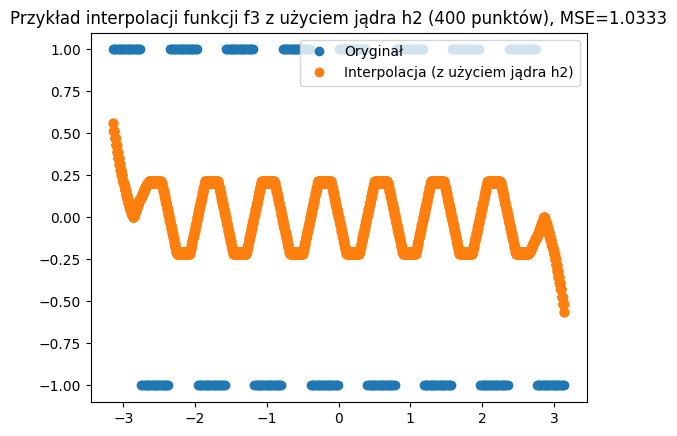

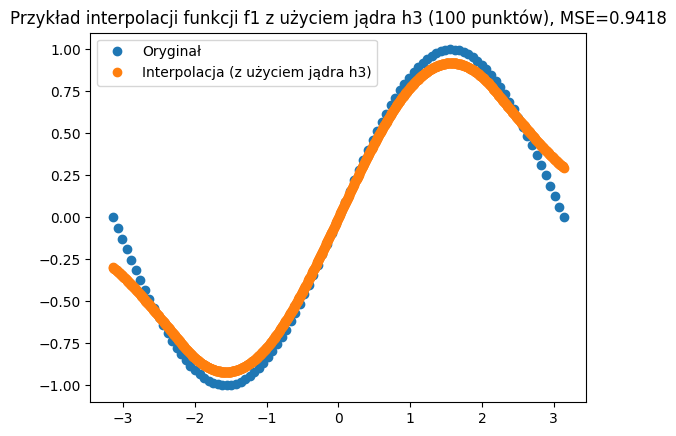

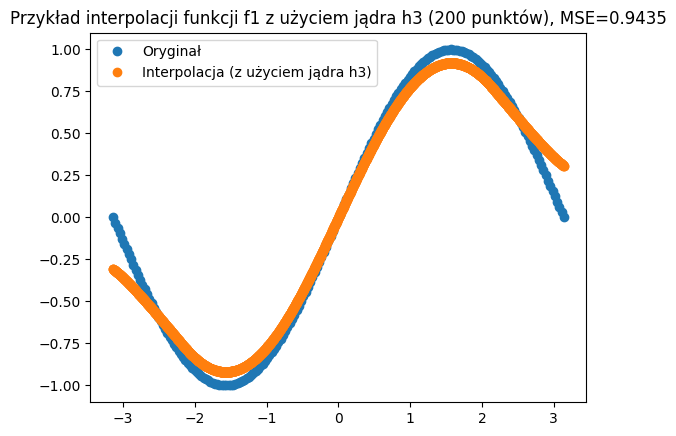

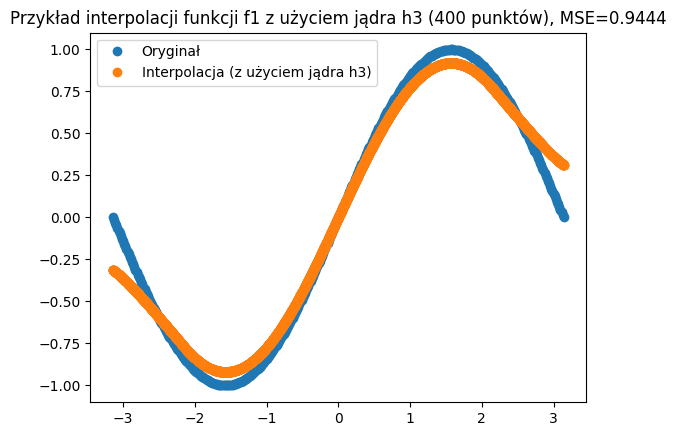

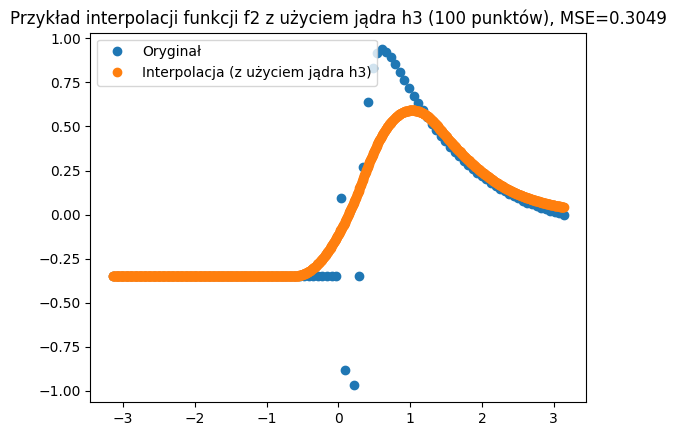

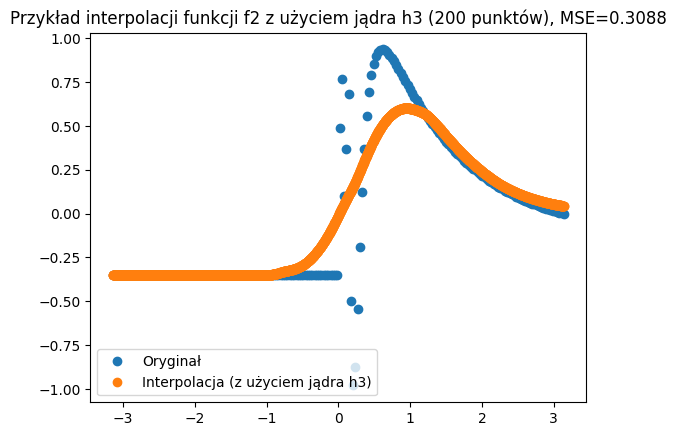

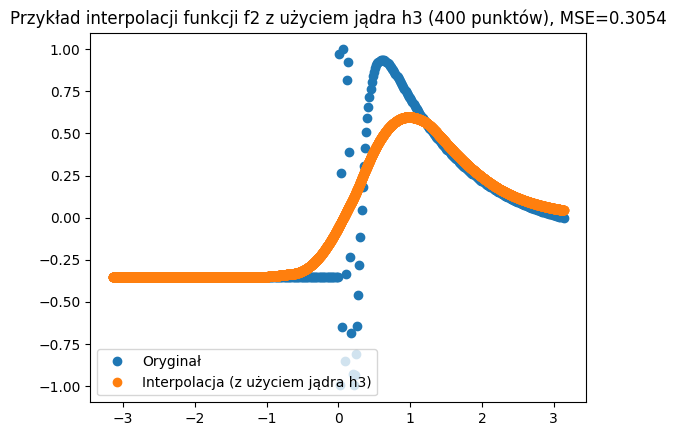

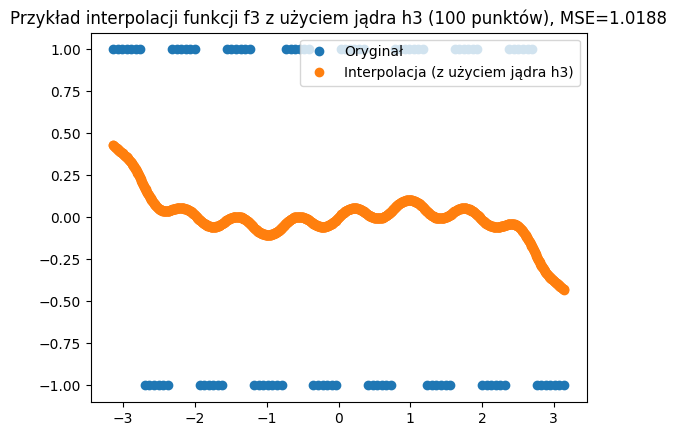

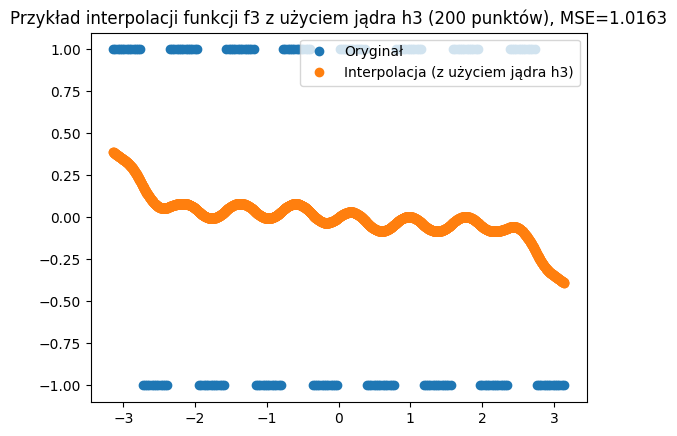

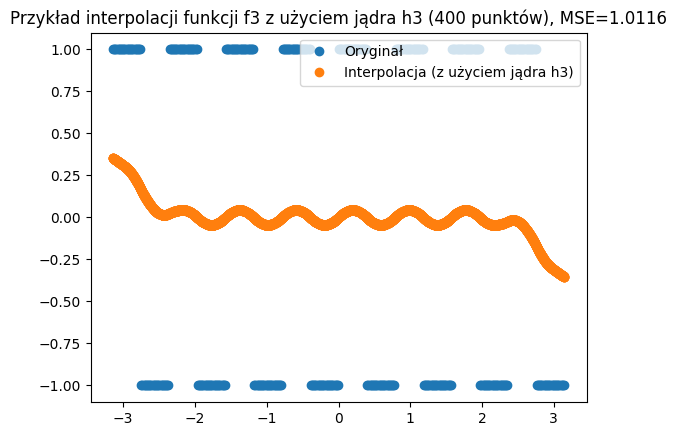

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def f1(x):
    return np.sin(x)

#def f2(x):
 #   return np.sin(1 / x)
def f2(x):
    epsilon = 1e-6
    x = np.clip(x, epsilon, None)
    return np.sin(1 / x) * np.sinc(x / np.pi)


def f3(x):
    return np.sign(np.sin(8 * x))

# Funkcje jądra
def h1(x):
    return np.where((x >= 0) & (x < 1), 1, 0)

def h2(x):
    return np.where((x >= -0.5) & (x <= 0.5), 1, 0)

def h3(x):
    return np.where((x >= -1) & (x <= 1), 1 - np.abs(x), 0)

jadra = [h1, h2, h3]
funkcje = [f1, f2, f3]
liczba_punktow = [100, 200, 400]

for jadro in jadra:
    for funkcja in funkcje:
        for n in liczba_punktow:
            x_original = np.linspace(-np.pi, np.pi, n)
            y_original = funkcja(x_original)

            x_interp = np.linspace(-np.pi, np.pi, n * 10)

            kernel_values = jadro(x_interp[:, np.newaxis] - x_original)
            y_interp = np.sum(kernel_values * y_original, axis=1) / np.sum(kernel_values, axis=1)

            mse = np.mean((funkcja(x_interp) - y_interp[:, np.newaxis])**2)

            plt.plot(x_original, y_original, 'o', label='Oryginał')
            plt.plot(x_interp, y_interp, 'o', label='Interpolacja (z użyciem jądra {})'.format(jadro.__name__))
            plt.title('Przykład interpolacji funkcji {} z użyciem jądra {} ({} punktów), MSE={:.4f}'.format(funkcja.__name__, jadro.__name__, n, mse))
            plt.legend()
            plt.show()
